In [14]:
import numpy as np
from matplotlib import pyplot as plt
import pickle

# Define a helper function to load and save pickles of lists of arrays

class Data:
    def __init__(self, array_list):
        self.array_list = array_list

    def save(self, filename):
        with open(filename, 'wb') as f:
            pickle.dump(self.array_list, f)

    @classmethod
    def load(cls, filename):
        with open(filename, 'rb') as f:
            array_list = pickle.load(f)
        return cls(array_list)

In [18]:
# Load in each trial and compute average and std error bars

results_trials = []  # [[result_res0, result_res1, result_res2], ... for each trial]
ntrials = 4
for trial in range(ntrials):    
    results_trials.append( Data.load(f'autocorrel_res012_1us_trial{trial}.pkl').array_list )

# Store all these results in a (ntrials, nres, ntau) array so that we can easiliy calculate means and var
nres = 3
ntau = len(results_trials[0][0])
results = np.zeros( (ntrials, nres, ntau) )
for trial in range(ntrials):
    for res in range(nres):
        results[trial,res,:] = results_trials[trial][res]

# Calculate the mean and std over the trials
results_mean = np.mean(results, axis=0)  # (nres, ntau)
results_std = np.std(results, axis=0)


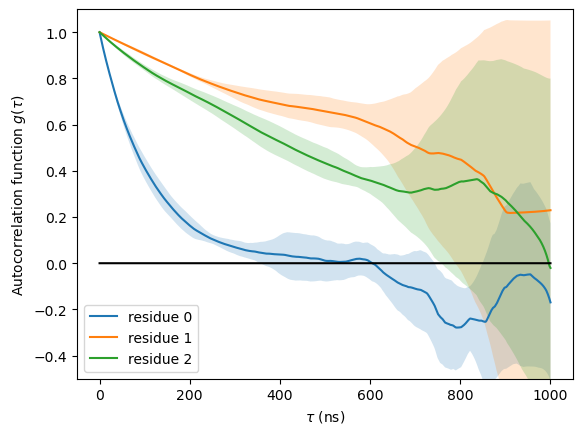

In [21]:
ns_per_step = 0.01
time = np.arange(ntau)*ns_per_step

plt.figure()

for res in range(nres):
    plt.plot(time, results_mean[res,:], label=f'residue {res}')
    plt.fill_between(time, results_mean[res,:]+results_std[res,:], results_mean[res,:]-results_std[res,:], alpha=0.2, lw=1)
plt.plot(time, np.zeros( time.shape ), 'k-') # plot time-axis
plt.ylim(-0.5,1.1)
plt.xlabel(r'$\tau$ (ns)')
plt.ylabel(r'Autocorrelation function $g(\tau)$')
plt.legend(loc='best')

plt.savefig('autocorrel_res012_1us_errorbars.pdf')